<a href="https://colab.research.google.com/github/sameertipnis/AlgoTrading/blob/main/Lecture_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# Agenda 

### 1.   Announcement
### 2.   Review of the first lecture
### 3.   Outline of the Course
### 4.   Brief Introduction to Python
### 5.   Writing simple screener in Python




## 1. Announcement

* ##   Three Hour Class
* ##   Office hours on Demand




## 2.Review the first lecture
* ###  Context of Algorithmic Trading - Basic Drivers
* ###  Uptick in Volume and Liquidity
* ###  Tighter spread on Products
* ###  Increase in Transperancy of Trading Activities
* ###  Provide higher value to investor and issuers.































##3. Markets and Trading 
   * ###  Buy Side Vs Sell Side
   * ###  Market Makers Vs Liquidity Seekers
   * ###  Systemic Vs Non-Systemic
   * ###  Trading Strategies
      * ### Model Based Strategies
      * ### Machine learning Model Based Strategy

## 4. Outline of the Course
* ### Lecture 3 and  Lecture 4   
   * ### VWAP Trading Strategies
   * ### Time series Analysis - ARIMA model
   * ### Long Short Equity using - Garch Model
* ### Lecture 5 
   * ### Machine Learning basics with Python
* ### Lecture 6 and 7
   * ### Tensor Flow pipelines for strategies 
   * ### Neural Networks using Tensor Flow
* ### Lecture 8
   * ### Renforcement learning based Trading Strategy  


## 5. Python 
* ### Why Python has gained so much acceptance in finance industry
* ### Python features which are relevant for Algotrading 
   * ### Availability of rich mathematical libraries such as Numpy
   * ### Availability of libraries for process big datasets such as Pandas
   * ### Availability of visualizing tool libraries such as Matplotlib and Seaborn
   * ### Functional language feature of Python ( in my view the most important aspect of python )
   

## 6. Python Installation 
* ### Anaconda  
* ### Juypter Notebook
* ### Google Colab 

#**Simple Momentum / Trend Following strategy** 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
gld = pd.read_csv('/content/drive/My Drive/NYU/AlgoTrading-Summer-2022/GLD.csv')

In [6]:
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
0,1,119.650002,119.660004,119.309998,119.430000
1,2,118.290001,118.540001,118.169998,118.360001
2,3,118.870003,119.050003,118.480003,118.809998
3,4,119.059998,119.059998,118.690002,118.900002
4,5,117.970001,118.639999,117.910004,118.320000


### Add data/transform data
* calculate signal based on some price or statistical parameter 
* we are going to try a moving average crossover to generate signals
* for this strategy we will always by "in" a trade, either long or short
* we are modeling; this means real life variation should be expected

#### Add moving averages to the data frame

In [8]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
19,20,119.000000,119.389999,118.750000,119.260002,117.246667,NaN
20,21,119.519997,119.580002,119.180000,119.309998,117.656666,117.438095
21,22,118.989998,119.320000,118.790001,118.919998,117.977777,117.413809
22,23,118.570000,120.150002,118.550003,119.879997,118.428888,117.486190
23,24,120.099998,120.139999,119.279999,119.790001,118.764444,117.532857
24,25,120.150002,120.860001,120.139999,120.690002,119.142222,117.618095


#### Add "signal" column

In [9]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
20,21,119.519997,119.580002,119.180000,119.309998,117.656666,117.438095,1
21,22,118.989998,119.320000,118.790001,118.919998,117.977777,117.413809,1
22,23,118.570000,120.150002,118.550003,119.879997,118.428888,117.486190,1
23,24,120.099998,120.139999,119.279999,119.790001,118.764444,117.532857,1
24,25,120.150002,120.860001,120.139999,120.690002,119.142222,117.618095,1


#### Calculate Instantaneous returns/system returns

In [10]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
20,21,119.519997,119.580002,119.180000,119.309998,117.656666,117.438095,1,NaN,NaN,NaN
21,22,118.989998,119.320000,118.790001,118.919998,117.977777,117.413809,1,-0.003274,-0.003274,0.0
22,23,118.570000,120.150002,118.550003,119.879997,118.428888,117.486190,1,0.008040,0.008040,0.0
23,24,120.099998,120.139999,119.279999,119.790001,118.764444,117.532857,1,-0.000751,-0.000751,0.0
24,25,120.150002,120.860001,120.139999,120.690002,119.142222,117.618095,1,0.007485,0.007485,0.0


#### Plot trades on time series

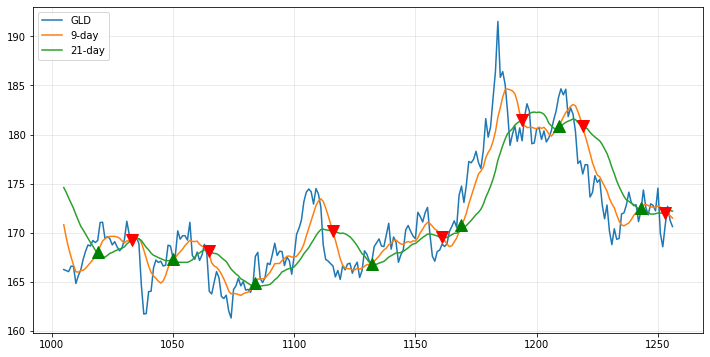

In [11]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

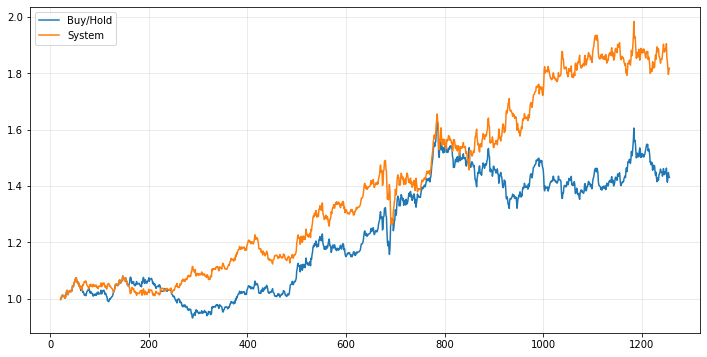

In [12]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)